#### Student Performance Indicator

##### Life cycle of machine learning project

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory Data Analysis
- Data Pre-preprocessing
- Model Training
- choose the best model

##### 1) Problem statement
- This project understands the how students performance (test scores) is affected by other varibles such as Gender, Ethnticity, Parental level of education, Lunch and test preparation course.

##### 2) Data Collection
- Dataset source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
- The dataset consists of 8 column and 1000 rows

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('data/stud.csv')

In [10]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [12]:
data.shape

(1000, 8)

##### 2.2 Dataset information
- gender sex of students -> (Male/female)

- race/ethnicity ethnicity of students -> (Group A, B,C, D,E)
- parental level of education parents final education->(bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: having lunch before test (standard or free/reduced)
- test preparation course complete or not - complete before test
- math score
- reading score
- writing score

##### 3. Data Checks to perform
- check Missing values
- check Duplicates
- check datatype
- check the number of unique values of each column
- check the statistics of dataset
- check various categories present in the different categorical column

##### 3.1 Checking Missing values

In [16]:
data.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values in dataset

##### 3.2 Check Duplicates

In [17]:
data.duplicated().sum()

0

There are no duplicates in dataset

##### 3.3 Check Datatypes

In [18]:
data.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


##### 3.4 Check the number of unique values of ecah column

In [21]:
data.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

##### 3.5 Check the statistics of dataset

In [22]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### 3.6 Exploring Data

In [24]:
data.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [26]:
print("categories in 'gender' variable: ", end=' ')
print(data['gender'].unique())

print("categories in 'race_ethnicity' variable: ", end=' ')
print(data['race_ethnicity'].unique())

print("categories in 'parental_level_of_education' variable: ", end=' ')
print(data['parental_level_of_education'].unique())

print("categories in 'lunch' variable: ", end=' ')
print(data['lunch'].unique())

print("categories in 'test_preparation_course' variable: ", end=' ')
print(data['test_preparation_course'].unique())

categories in 'gender' variable:  ['female' 'male']
categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:  ['standard' 'free/reduced']
categories in 'test_preparation_course' variable:  ['none' 'completed']


In [31]:
for col in data.columns:
    print(data[col].value_counts(),'\n')

gender
female    518
male      482
Name: count, dtype: int64 

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64 

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64 

lunch
standard        645
free/reduced    355
Name: count, dtype: int64 

test_preparation_course
none         642
completed    358
Name: count, dtype: int64 

math_score
65    36
62    35
69    32
59    32
61    27
      ..
24     1
28     1
33     1
18     1
8      1
Name: count, Length: 81, dtype: int64 

reading_score
72    34
74    33
64    32
67    30
73    30
      ..
28     1
26     1
17     1
32     1
40     1
Name: count, Length: 72, dtype: int64 

writing_score
74    35
70    33
68    31
73    28
80    27
      ..
28     1
35     1
19     1
22     1
23     1
Name: count, Length: 77, dtype:

In [36]:
# Numerical and Categorical Features
numerical_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']

print('we have {} and numerical features {}'.format(len(numerical_features), numerical_features))
print('we have {} and categorical features {}'.format(len(categorical_features), categorical_features))

we have 3 and numerical features ['math_score', 'reading_score', 'writing_score']
we have 5 and categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


##### 3.7 Adding columns for 'Total Score' and 'Average'

In [37]:
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [38]:
data['total_score'] = data['math_score'] + data['reading_score'] + data['writing_score']
data['average'] = data['total_score']/3

data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [44]:
reading_full = data[data['reading_score'] == 100]['average'].count()
writing_full = data[data['writing_score'] == 100]['average'].count()
math_full = data[data['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in reading : {reading_full}')
print(f'Number of students with full marks in writing : {writing_full}')
print(f'Number of students with full marks in math : {math_full}')

Number of students with full marks in reading : 17
Number of students with full marks in writing : 14
Number of students with full marks in math : 7


In [46]:
reading_less_20 = data[data['reading_score'] <= 20]['average'].count()
writing_less_20 = data[data['writing_score'] <= 20]['average'].count()
math_less_20 = data[data['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 marks in reading : {reading_less_20}')
print(f'Number of students with less than 20 marks in writing : {writing_less_20}')
print(f'Number of students with less than 20 marks in math : {math_less_20}')

Number of students with less than 20 marks in reading : 1
Number of students with less than 20 marks in writing : 3
Number of students with less than 20 marks in math : 4


##### Insights
- From above values we get students have performed worst in maths
- Best performance in reading section

##### 4. Exploring Data (Visualization)

4.1 Visualize average score distribution to make some conclusion

- Histogram
- Kernal Distribution Function (KDE)

4.1.1 Histogram & KDE

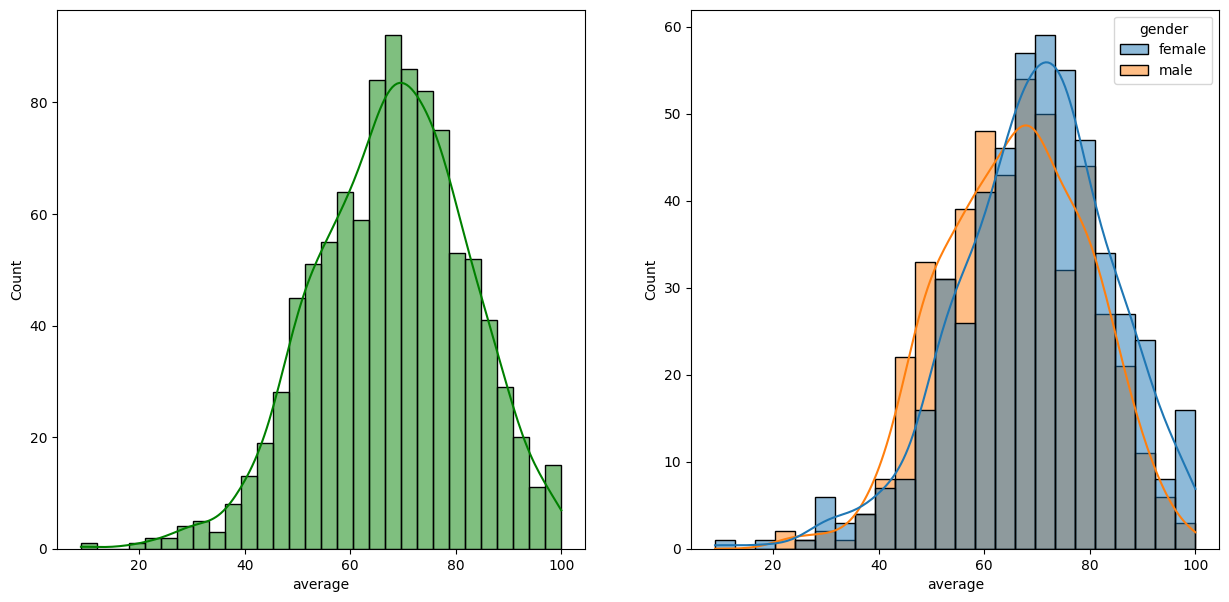

In [54]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121) # used to create a grid of subplots
sns.histplot(data = data, x = 'average', bins = 30, kde = True, color = 'g' )
plt.subplot(122)
sns.histplot(data = data, x = 'average', kde = True, hue = 'gender')
plt.show()

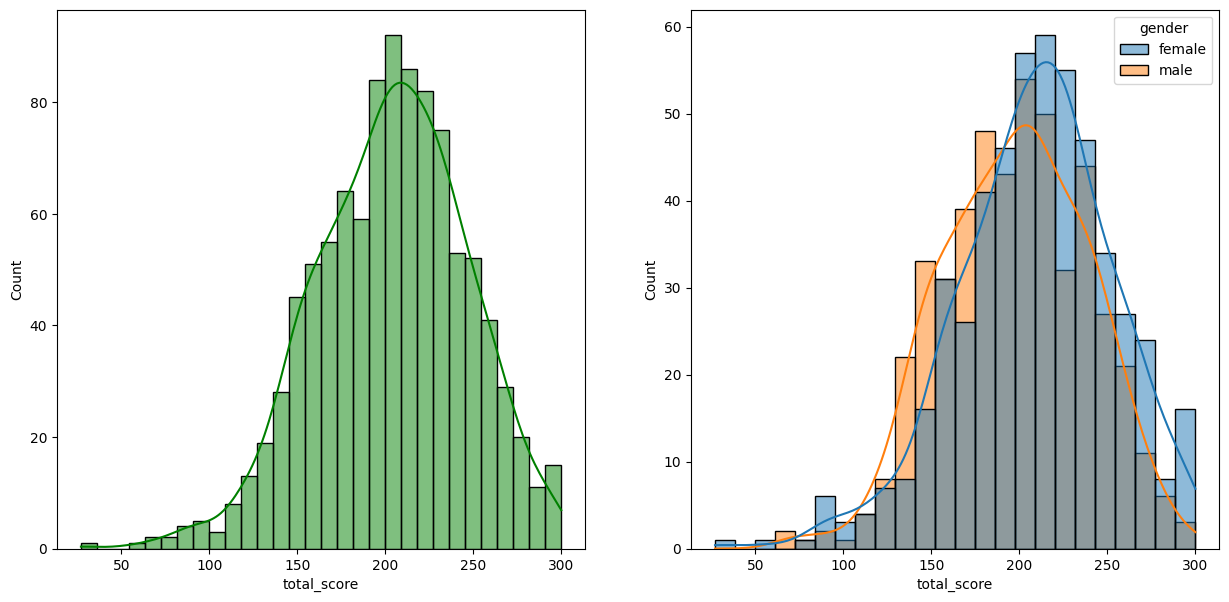

In [63]:
fig, ax = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data = data, x = 'total_score', bins = 30, kde = True, color = 'g' )
plt.subplot(122)
sns.histplot(data = data, x = 'total_score', kde = True, hue = 'gender')
plt.show()

##### Insights
- female students tend to perform well than male students

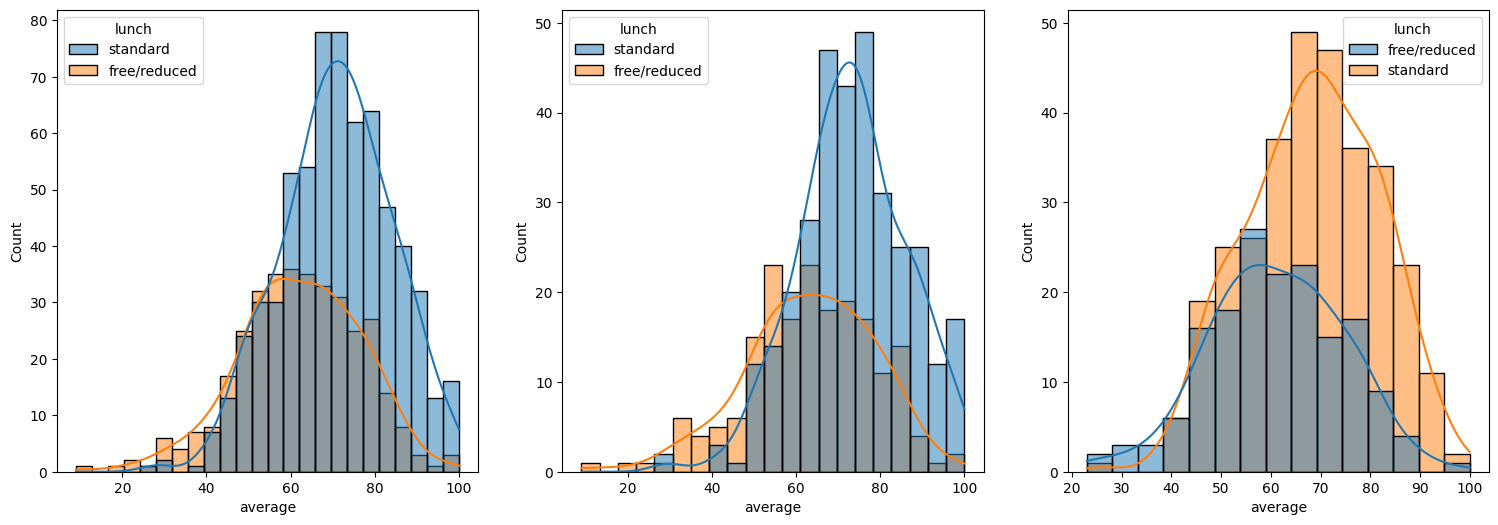

In [57]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data = data, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average', kde='True', hue='lunch')
plt.show()

##### Insights
- standard lunch helps male and female students to perform well in exams

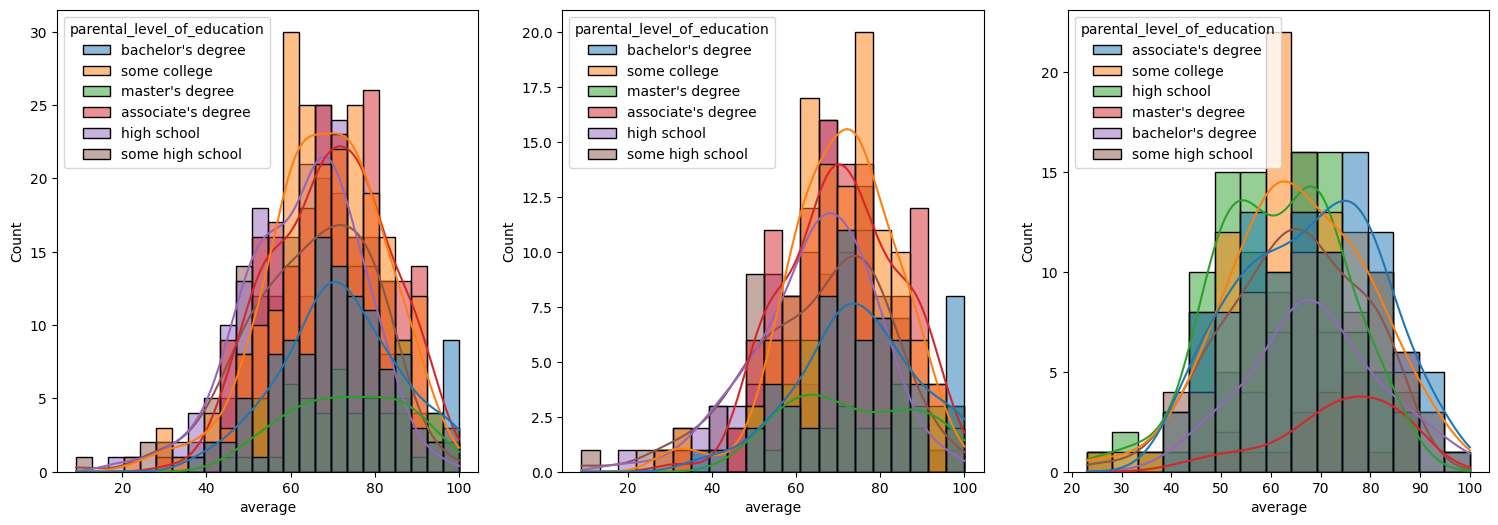

In [67]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # sused to create a grid of subplots
sns.histplot(data=data, x='average', kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True,hue='parental_level_of_education')
plt.show()

##### Insights
- In general parents education don't help studenst to perform well in exam
- In 2nd plot parents education do not effect the female students performance
- 3rd plot shows that parents whose eduation is associate's degree and master's degree their male child tend to perform well in exams

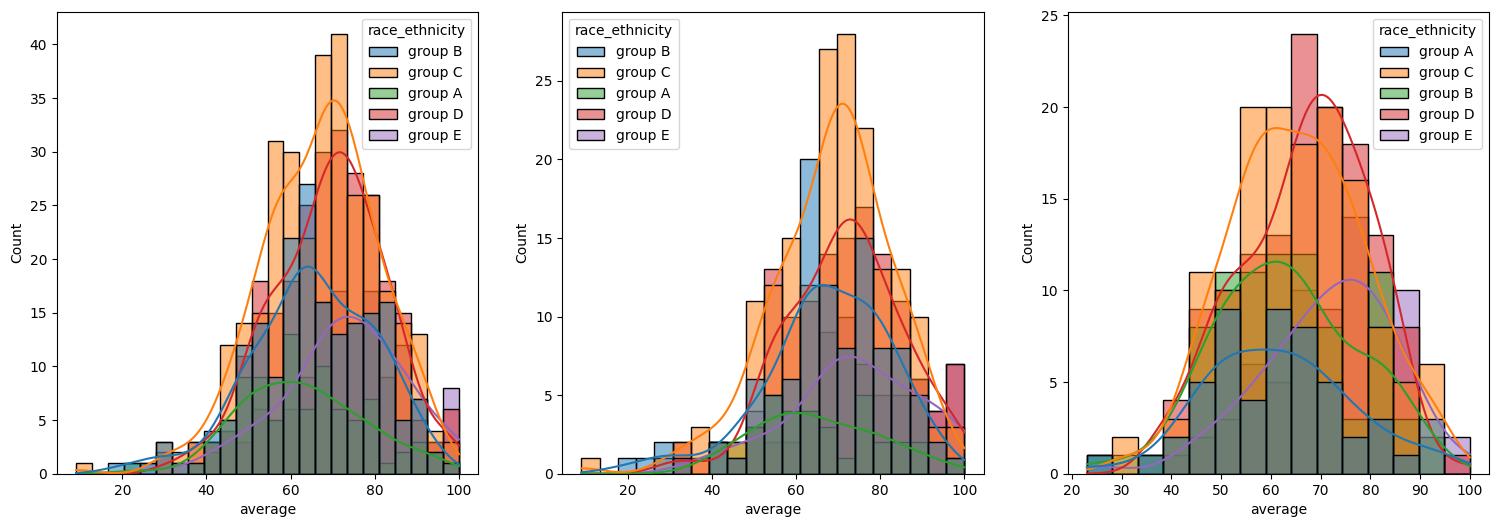

In [68]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141) # sused to create a grid of subplots
sns.histplot(data=data, x='average', kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'], x='average', kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'], x='average', kde=True,hue='race_ethnicity')
plt.show()

##### Insights
- Studensts of group C perform well in exams
- studenst of group A and group B tends to perform poorly irrespective of gender

4.2 Maximum score of students in all three subjects

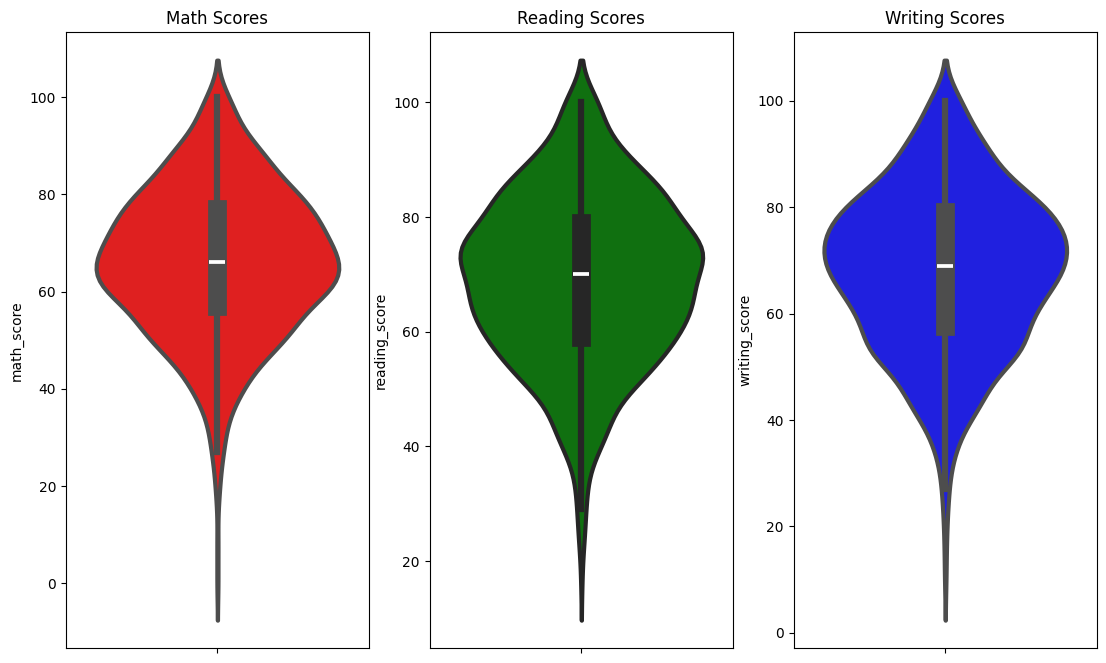

In [81]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(data=data,y='math_score',color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading Scores')
sns.violinplot(data=data,y='reading_score', color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(data=data,y='writing_score',color='blue',linewidth=3)
plt.show()

##### Insights 
- from the above plots clearly visible that most of the students score in betwwen 60-80 in Maths whereas in reading and writing most of them score 50-80

4.3 Multivariate analysis using pieplot

(-1.25, 1.25, -1.25, 1.25)

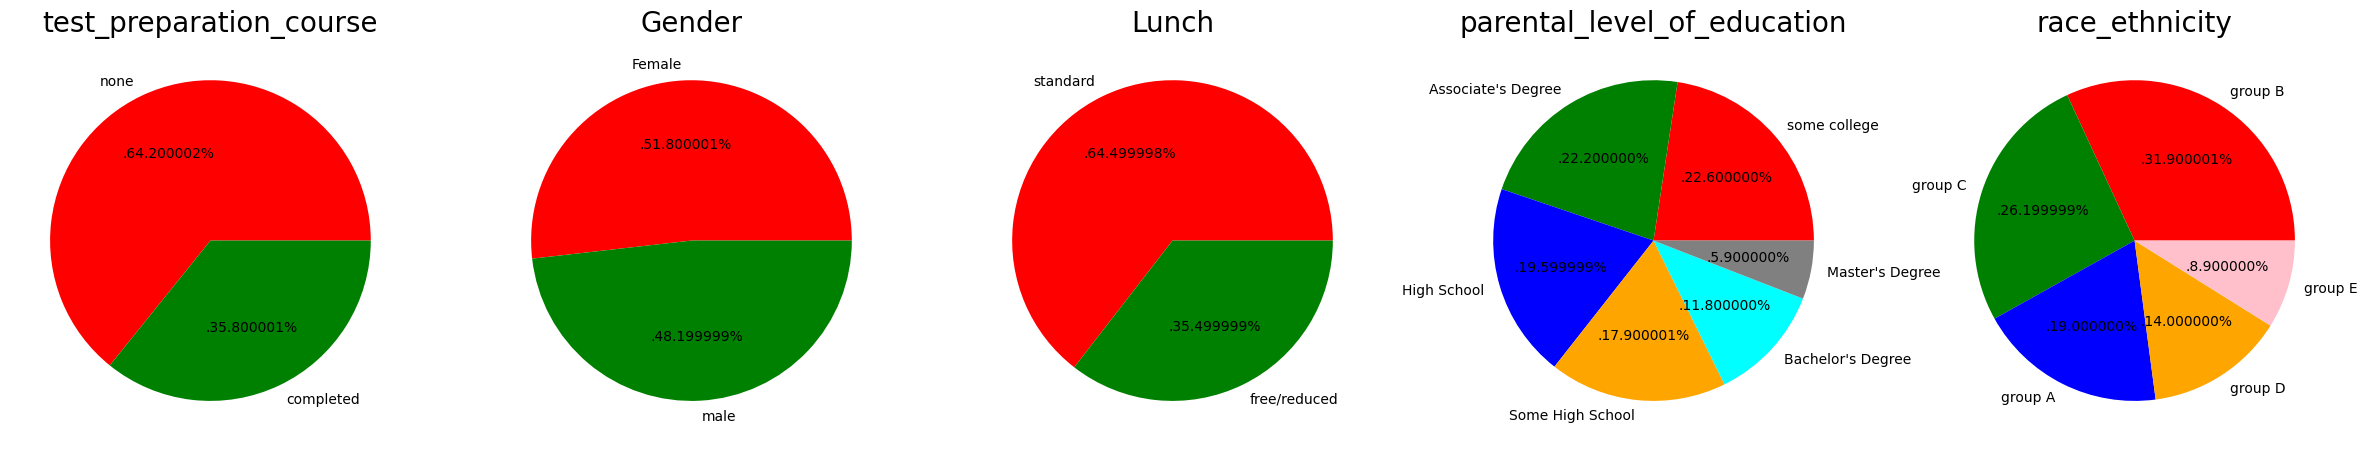

In [87]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,2)
sizes = data['gender'].value_counts()
labels = 'Female','male'
color = ['red', 'green']

plt.pie(sizes, colors=color, labels=labels, autopct='.%2f%%' )
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
sizes = data['lunch'].value_counts()
labels = 'standard','free/reduced'
color = ['red','green']

plt.pie(sizes, colors=color, labels=labels,autopct='.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')


plt.subplot(1,5,4)
sizes = data['parental_level_of_education'].value_counts()
labels = 'some college',"Associate's Degree",'High School','Some High School',"Bachelor's Degree", "Master's Degree"
color = ['red','green','blue','orange','cyan','grey']

plt.pie(sizes, colors=color, labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education', fontsize=20)
plt.axis('off')


plt.subplot(1,5,5)
sizes = data['race_ethnicity'].value_counts()
labels = 'group B', 'group C', 'group A', 'group D', 'group E'
color = ['red','green','blue','orange','pink']

plt.pie(sizes, colors=color, labels=labels,autopct='.%2f%%')
plt.title('race_ethnicity', fontsize=20)
plt.axis('off')


plt.subplot(1,5,1)
sizes = data['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red','green']

plt.pie(sizes, colors=color, labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course', fontsize=20)
plt.axis('off')

##### Insights
- Number of male and female studenst is almost equal
- Number of students are greatest in group C
- Number of studnets have standard lunch is greater
- Number of students not enrolled in test preparation course is greater
- Number of studenst whose parental education is "Associate's Degree" is greater followed by 'Some College'